In [22]:
import sys
sys.path.append("..")
from src.optimization_src.TDR_opti import full_pipeline, optimize_TDR_params, interpolate_interior
from src.optimization_src.knot_opti import KnotOpti
from src.geometry_src import geom
from src.geometry_src.rolliness import rolliness
import numpy as np
import torch
from scipy.spatial import ConvexHull
from src.geometry_src.geom_utils_torch import rotate_about_axis

TORCH_DTYPE = torch.float64
morton_knot = geom.rotated_morton_knot_parametric

from matplotlib import pyplot as plt

In [23]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
def plot(base, stretched, projected):
    
    fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(10,5))
    ax1, ax2, ax3 = axs
    for ax in axs:
        ax.set_ylim(-1,1)
        ax.set_xlim(-1,1)
        ax.set_zlim(-1,1)

    x,y,z = base.T
    ax1.plot(x,y,z)
    ax1.set_title("Base knot")

    x,y,z = stretched.T
    ax2.plot(x,y,z)
    ax2.set_title("Stretched knot")

    x,y,z = projected.T
    ax3.plot(x,y,z)
    ax3.set_title("Projected knot")
    
def run(a, p, n, n_tdr, curve_opt_params):
    ko = KnotOpti(a=a, p=p, n=n, n_tdr=n_tdr, rotated=True, curve_opt_params=curve_opt_params, **curve_opt_params)

    ko.optimize()
    base_knot, stretched_knot, projected_knot = ko.base_knot, ko.stretched_knot, ko.projected_knot

    # plot(base_knot, stretched_knot, projected_knot)

    x,y,z = ko.projected_knot.T
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10,10))
    ax.plot(x,y,z, label="Projected knot")

    x, y, z = ko.stretched_knot.T
    ax.plot(x,y,z, color="red", label="Stretched knot")

    x, y, z = ko.tdr1.T
    ax.plot(x,y,z,color="green", label="TDR")

    fig.legend()

    print(f"Rho: {rolliness(projected_knot.numpy())[0]}")
    
    return ko

def save_all(ko):
    ko.save(ko.base_knot, "base")
    ko.save(ko.stretched_knot, "stretched")
    ko.save(ko.projected_knot, "projected")
    ko.save(ko.tdr1, "tdr1")
    ko.save(ko.tdr2, "tdr2")

# Figure 2

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92388D-01    |proj g|=  8.78087D-01

At iterate    1    f=  2.77237D-01    |proj g|=  2.85171D-01

At iterate    2    f=  2.57223D-01    |proj g|=  2.56058D-01

At iterate    3    f=  2.26042D-01    |proj g|=  6.73083D-01

At iterate    4    f=  2.08558D-01    |proj g|=  1.03701D+00

At iterate    5    f=  1.92111D-01    |proj g|=  8.78536D-01

At iterate    6    f=  1.66040D-01    |proj g|=  6.15234D-01

At iterate    7    f=  1.04172D-01    |proj g|=  1.14126D+00

At iterate    8    f=  8.66670D-02    |proj g|=  1.54053D+00

At iterate    9    f=  6.37288D-02    |proj g|=  8.68630D-01

At iterate   10    f=  5.88115D-02    |proj g|=  3.98058D-01

At iterate   11    f=  5.75668D-02    |proj g|=  2.42681D-01

At iterate   12    f=  5.73293D-02    |proj g|=  9.24296D-02

At it

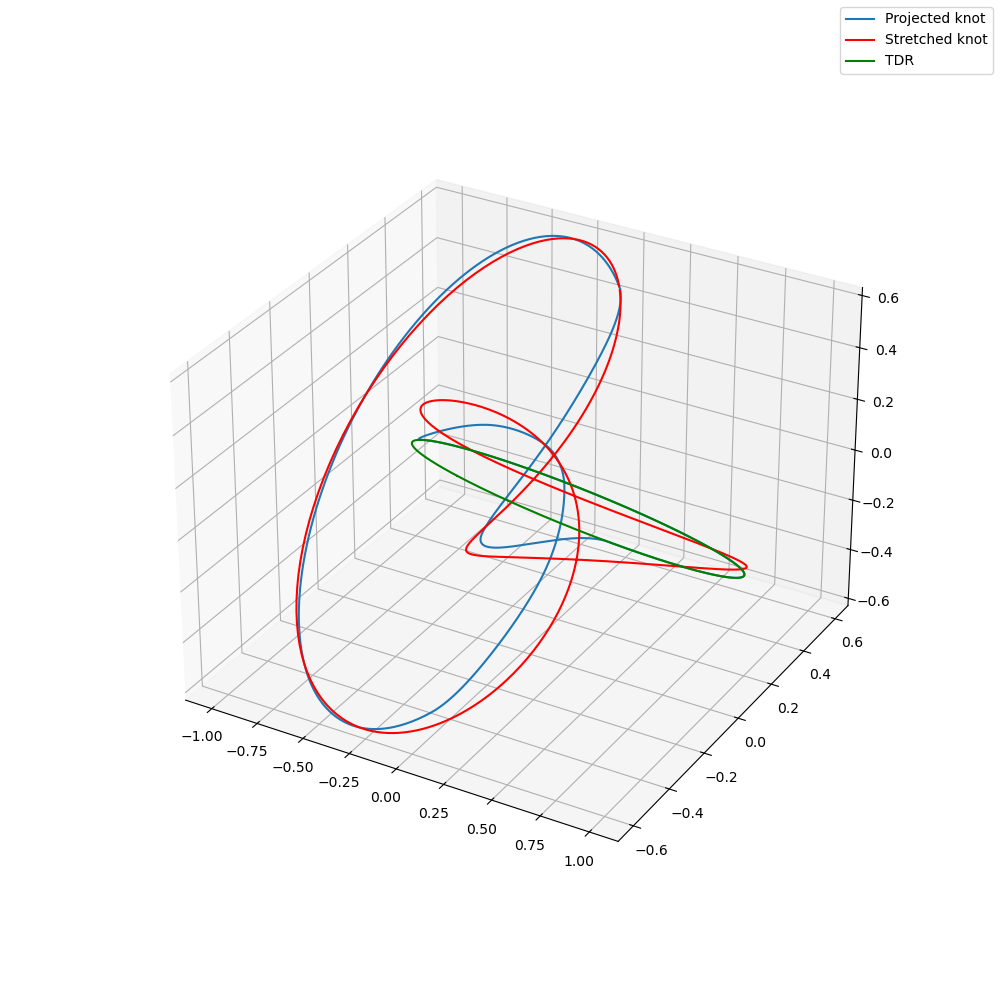

In [25]:
# knot params
a=0.75
p=3
# n=int(2e3)
n=500
n_tdr = n+1

curve_opt_params = {
    'w_tdr': 4e-2,
    'w_curvature': 1.5e4,
    'max_iter': 400,
    'factor_cps_to_pts': 32,
    'n_cps_int_per_seg': 7,
    'curvature_damping': 0
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [26]:
save_all(ko)

## Curve approximation vs. Smoothness

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92388D-01    |proj g|=  8.78087D-01

At iterate    1    f=  2.77237D-01    |proj g|=  2.85171D-01

At iterate    2    f=  2.57223D-01    |proj g|=  2.56058D-01

At iterate    3    f=  2.26042D-01    |proj g|=  6.73083D-01

At iterate    4    f=  2.08558D-01    |proj g|=  1.03701D+00

At iterate    5    f=  1.92111D-01    |proj g|=  8.78536D-01

At iterate    6    f=  1.66040D-01    |proj g|=  6.15234D-01

At iterate    7    f=  1.04172D-01    |proj g|=  1.14126D+00

At iterate    8    f=  8.66670D-02    |proj g|=  1.54053D+00

At iterate    9    f=  6.37288D-02    |proj g|=  8.68630D-01

At iterate   10    f=  5.88115D-02    |proj g|=  3.98058D-01

At iterate   11    f=  5.75668D-02    |proj g|=  2.42681D-01

At iterate   12    f=  5.73293D-02    |proj g|=  9.24296D-02

At it

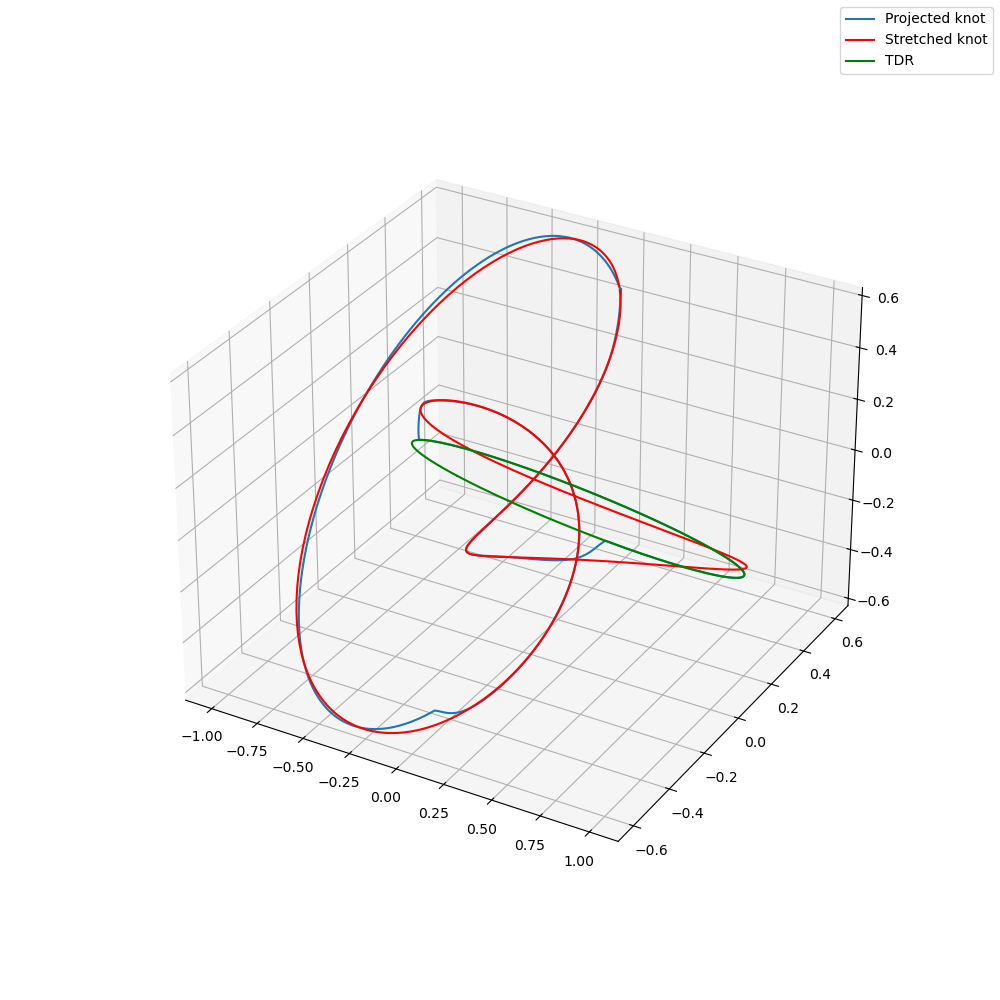

In [27]:
curve_opt_params = {
    'w_tdr': 0,
    'w_curvature': 0,
    'max_iter': 400,
    'factor_cps_to_pts': 32,
    'n_cps_int_per_seg': 7,
    'curvature_damping': 0
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [ ]:
save_all(ko)

# Figure 3

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.06831D-01    |proj g|=  6.04808D-01

At iterate    1    f=  5.89828D-01    |proj g|=  2.79371D-01

At iterate    2    f=  5.47445D-01    |proj g|=  2.13179D-01

At iterate    3    f=  5.17845D-01    |proj g|=  8.38906D-01

At iterate    4    f=  4.86009D-01    |proj g|=  9.62221D-01

At iterate    5    f=  4.53252D-01    |proj g|=  9.15678D-01

At iterate    6    f=  4.41494D-01    |proj g|=  3.04504D-01

At iterate    7    f=  3.58260D-01    |proj g|=  4.46989D-01

At iterate    8    f=  2.46653D-01    |proj g|=  2.02711D+00

At iterate    9    f=  2.05786D-01    |proj g|=  1.77784D+00

At iterate   10    f=  1.64396D-01    |proj g|=  2.13196D+00

At iterate   11    f=  1.47251D-01    |proj g|=  8.28975D-02

At iterate   12    f=  1.42086D-01    |proj g|=  4.09445D-01

At it

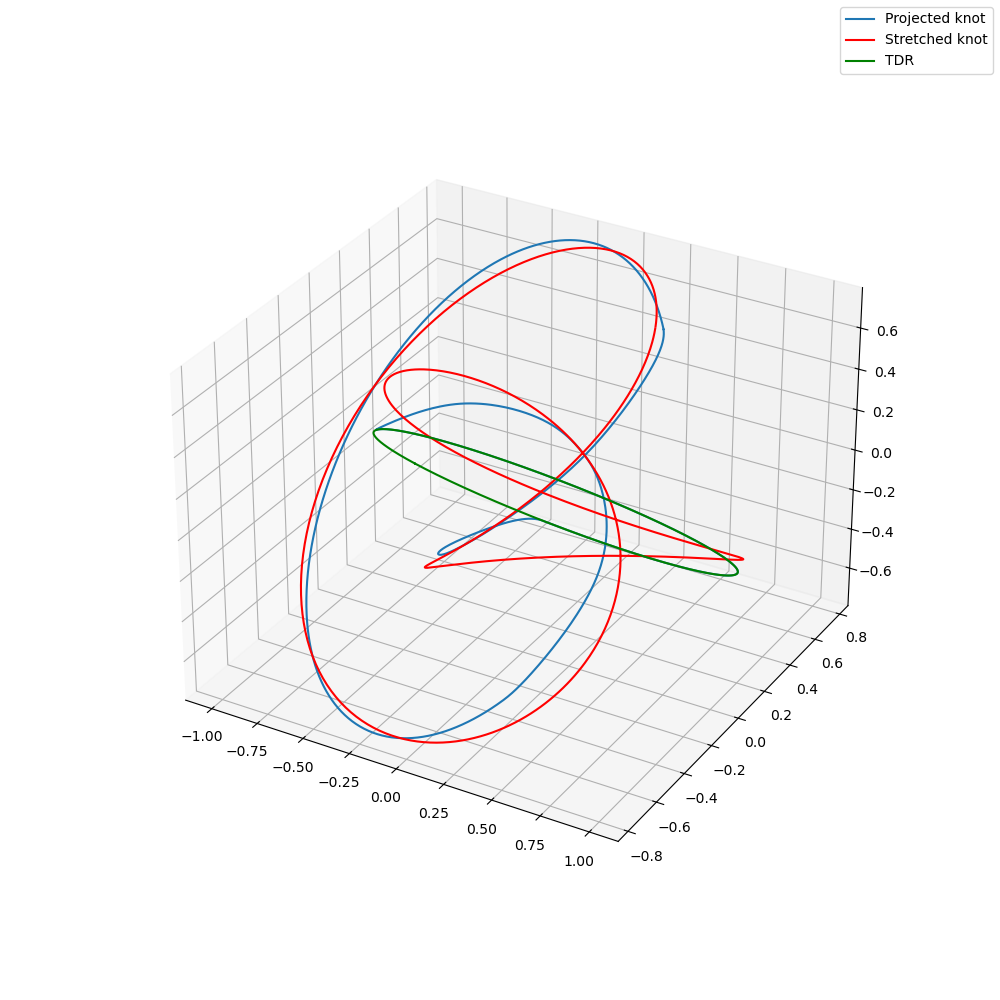

In [ ]:
a = 0.9
p = 3
n = 1000
n_tdr = n+1

curve_opt_params = {
    'w_tdr': 7e-2,
    'w_curvature': 1000.0,
    'max_iter': 400,
    'factor_cps_to_pts': 32,
    'n_cps_int_per_seg': 7,
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [ ]:
save_all(ko)

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14702D-01    |proj g|=  9.93214D-01

At iterate    1    f=  1.96384D-01    |proj g|=  3.28554D-01

At iterate    2    f=  1.37331D-01    |proj g|=  5.69876D-01

At iterate    3    f=  1.28746D-01    |proj g|=  4.59169D-01

At iterate    4    f=  1.11259D-01    |proj g|=  5.34518D-01

At iterate    5    f=  9.57886D-02    |proj g|=  2.13567D+00

At iterate    6    f=  5.78336D-02    |proj g|=  1.06793D+00

At iterate    7    f=  4.79566D-02    |proj g|=  1.32416D-01

At iterate    8    f=  4.51021D-02    |proj g|=  2.19739D-01

At iterate    9    f=  4.41376D-02    |proj g|=  1.30790D-01

At iterate   10    f=  4.40315D-02    |proj g|=  6.99207D-02

At iterate   11    f=  4.40169D-02    |proj g|=  1.16515D-02

At iterate   12    f=  4.40156D-02    |proj g|=  2.83747D-03

At it

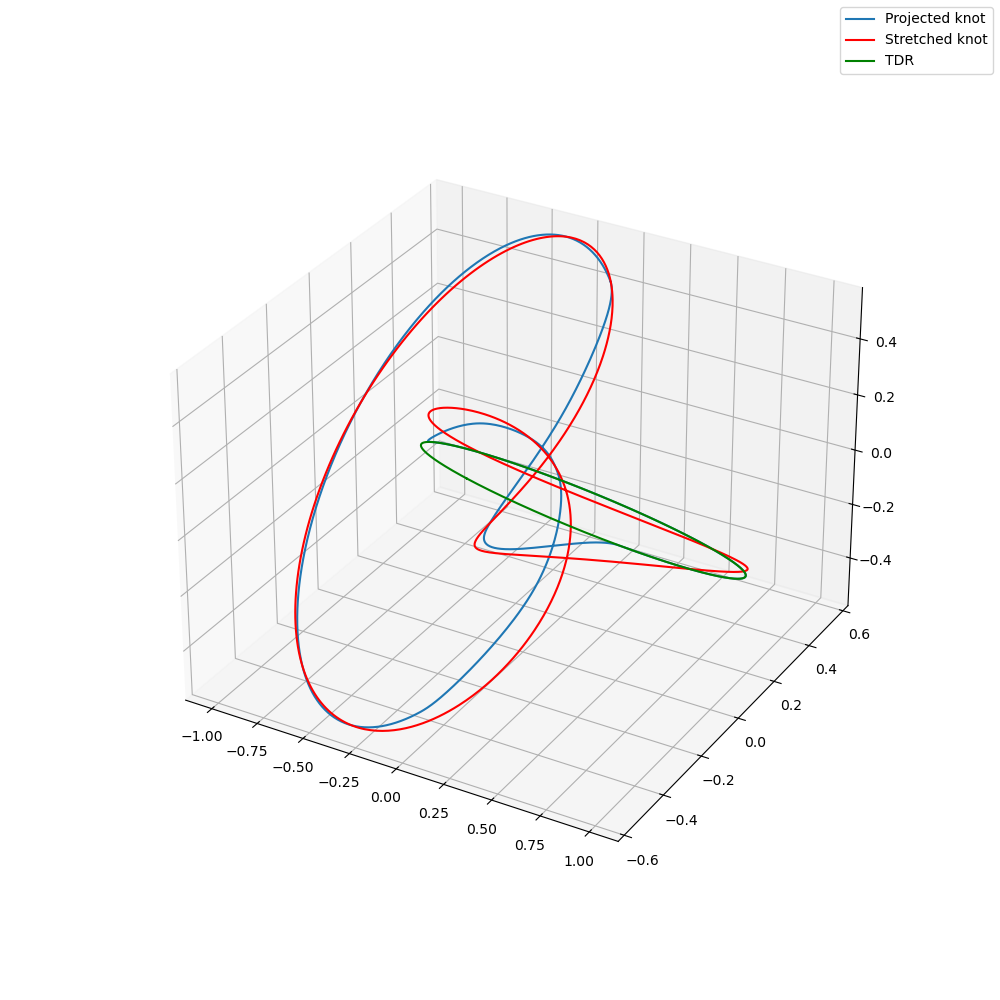

In [ ]:
a = 0.7
p = 3
n = 1000
n_tdr = n+1

curve_opt_params = {
    'w_tdr': 3e-2,
    'w_curvature': 1000.0,
    'max_iter': 400,
    'factor_cps_to_pts': 32,
    'n_cps_int_per_seg': 7,
    'curvature_damping': 0
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [ ]:
save_all(ko)

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.93843D-02    |proj g|=  5.72894D-01

At iterate    1    f=  8.78020D-02    |proj g|=  1.50883D+00

At iterate    2    f=  7.40467D-02    |proj g|=  9.74005D-01

At iterate    3    f=  7.29708D-02    |proj g|=  1.58713D+00

At iterate    4    f=  5.46729D-02    |proj g|=  9.17931D-01

At iterate    5    f=  4.64439D-02    |proj g|=  1.18510D+00

At iterate    6    f=  3.87877D-02    |proj g|=  6.52996D-01

At iterate    7    f=  3.18927D-02    |proj g|=  4.74349D-01

At iterate    8    f=  2.42217D-02    |proj g|=  2.09160D+00

At iterate    9    f=  1.41178D-02    |proj g|=  8.69749D-01

At iterate   10    f=  1.35622D-02    |proj g|=  1.23411D-01

At iterate   11    f=  1.33302D-02    |proj g|=  1.46982D-01

At iterate   12    f=  1.32960D-02    |proj g|=  4.46314D-02

At it

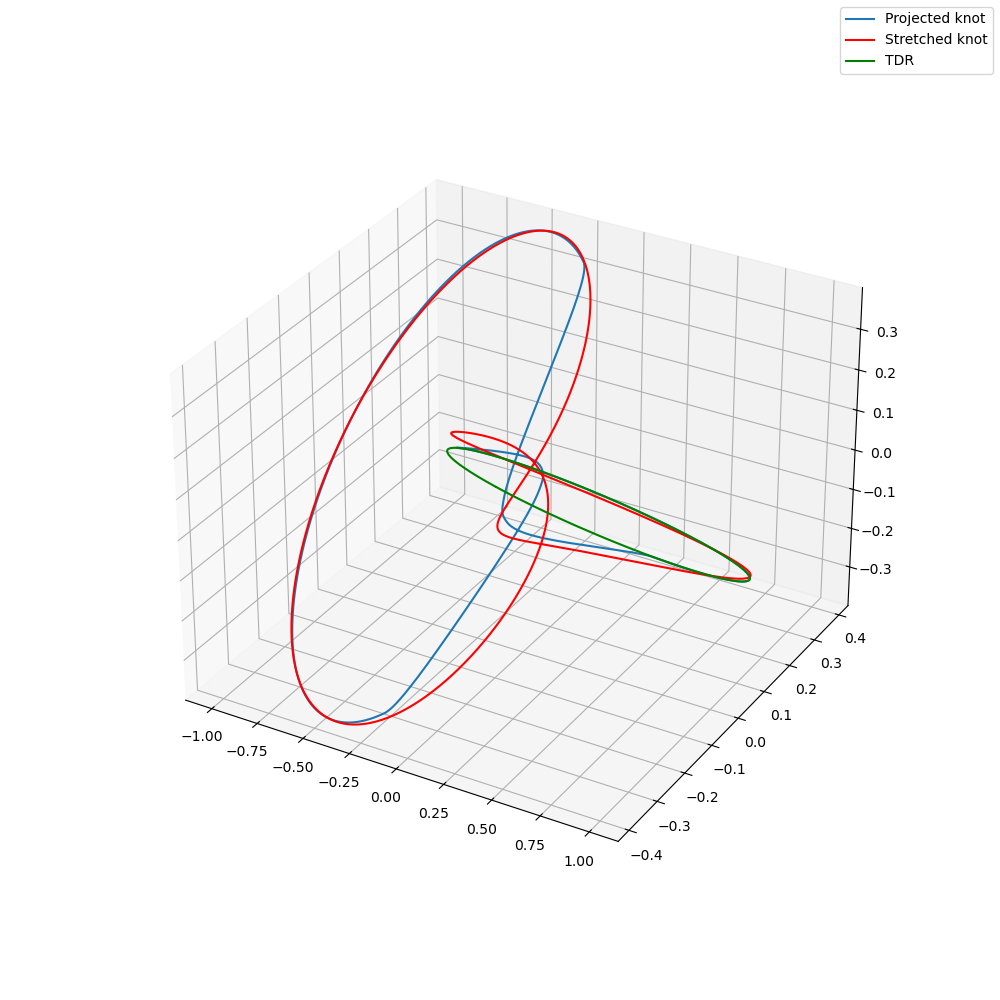

In [ ]:
a = 0.5
p = 3
n = 1000
n_tdr = n+1

curve_opt_params = {
    'w_tdr': 7e-2,
    'w_curvature': 1000.0,
    'max_iter': 400,
    'factor_cps_to_pts': 32,
    'n_cps_int_per_seg': 7,
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [ ]:
save_all(ko)

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06595D-01    |proj g|=  6.50743D-01

At iterate    1    f=  2.93763D-01    |proj g|=  4.40730D-01

At iterate    2    f=  1.07629D-01    |proj g|=  4.94661D-01

At iterate    3    f=  7.35547D-02    |proj g|=  6.27007D-01

At iterate    4    f=  6.73807D-02    |proj g|=  1.81062D+00

At iterate    5    f=  5.53035D-02    |proj g|=  4.62197D-01

At iterate    6    f=  3.01375D-02    |proj g|=  1.43415D+00

At iterate    7    f=  1.79113D-02    |proj g|=  1.79544D+00

At iterate    8    f=  1.39521D-02    |proj g|=  6.64266D-01

At iterate    9    f=  3.41229D-03    |proj g|=  2.19802D-01

At iterate   10    f=  2.86170D-03    |proj g|=  8.01171D-01

At iterate   11    f=  2.66775D-03    |proj g|=  3.60334D-01

At iterate   12    f=  2.62939D-03    |proj g|=  1.17705D-01

At it

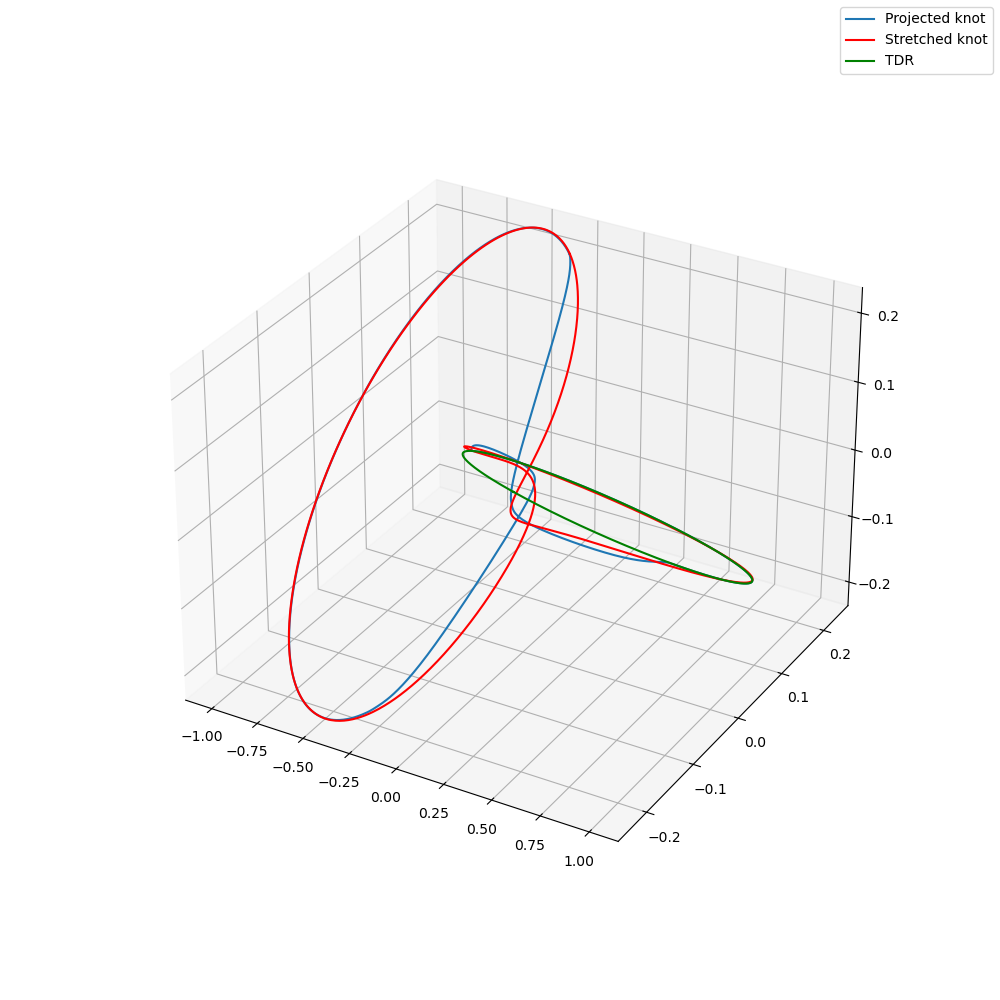

In [33]:
a = 0.3
p = 3
n = 2000
n_tdr = n+1

curve_opt_params = {
    'w_tdr': 1e-2,
    'w_curvature': 100.0,
    'max_iter': 400,
    'factor_cps_to_pts': 32,
    'n_cps_int_per_seg': 7,
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [34]:
save_all(ko)

# Generalized Knots

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45841D-01    |proj g|=  1.26654D+00

At iterate    1    f=  2.11582D-01    |proj g|=  2.78246D-01

At iterate    2    f=  1.50894D-01    |proj g|=  5.80889D-01

At iterate    3    f=  1.18161D-01    |proj g|=  8.26444D-01

At iterate    4    f=  1.14907D-01    |proj g|=  6.95116D-01

At iterate    5    f=  1.08617D-01    |proj g|=  2.93892D-01

At iterate    6    f=  1.01668D-01    |proj g|=  2.51135D-01

At iterate    7    f=  7.99153D-02    |proj g|=  3.69144D-01

At iterate    8    f=  7.93622D-02    |proj g|=  3.01475D-01

At iterate    9    f=  7.83050D-02    |proj g|=  2.34610D-02

At iterate   10    f=  7.81815D-02    |proj g|=  4.67255D-02

At iterate   11    f=  7.81645D-02    |proj g|=  4.91421D-03

At iterate   12    f=  7.81639D-02    |proj g|=  7.09384D-04

At it

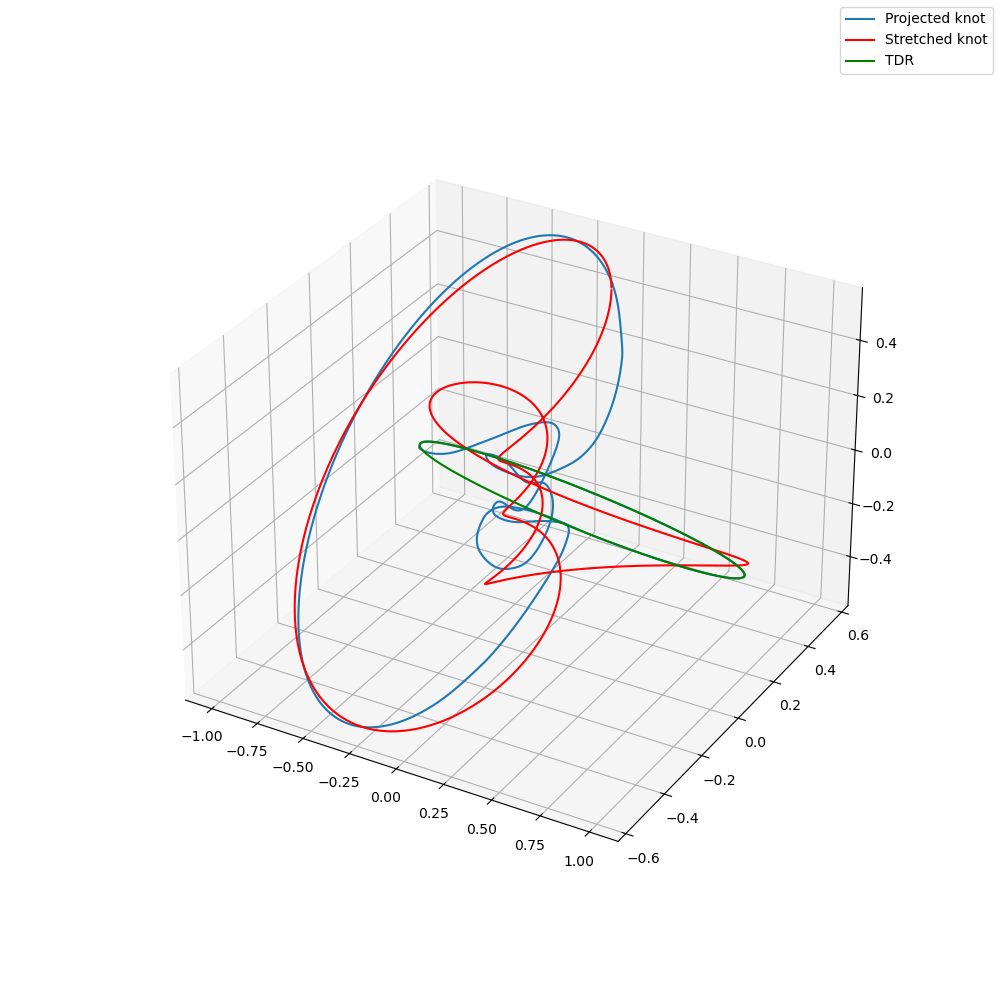

In [ ]:
# knot params
a=0.5
p=5
n=1001
n_tdr = n

# optimization params
curve_opt_params = {
    'w_tdr': 10,
    'w_curvature': 1e5,
    'max_iter': 400,
    'factor_cps_to_pts': 64,
    'n_cps_int_per_seg': 47,
    'curvature_damping': 2,
    'tdr_damping': 2,

}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [ ]:
save_all(ko)

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67973D-01    |proj g|=  9.65286D-01

At iterate    1    f=  4.13239D-01    |proj g|=  2.61251D-01

At iterate    2    f=  2.87669D-01    |proj g|=  7.68832D-01

At iterate    3    f=  2.70883D-01    |proj g|=  1.14298D+00

At iterate    4    f=  2.11655D-01    |proj g|=  1.06439D+00

At iterate    5    f=  1.93198D-01    |proj g|=  1.11879D-01

At iterate    6    f=  1.88879D-01    |proj g|=  1.80708D-01

At iterate    7    f=  1.88172D-01    |proj g|=  6.66334D-02

At iterate    8    f=  1.87483D-01    |proj g|=  5.01159D-02

At iterate    9    f=  1.87481D-01    |proj g|=  6.92132D-03

At iterate   10    f=  1.87462D-01    |proj g|=  1.14004D-02

At iterate   11    f=  1.87461D-01    |proj g|=  8.10989D-03

At iterate   12    f=  1.87461D-01    |proj g|=  4.06653D-03

At it

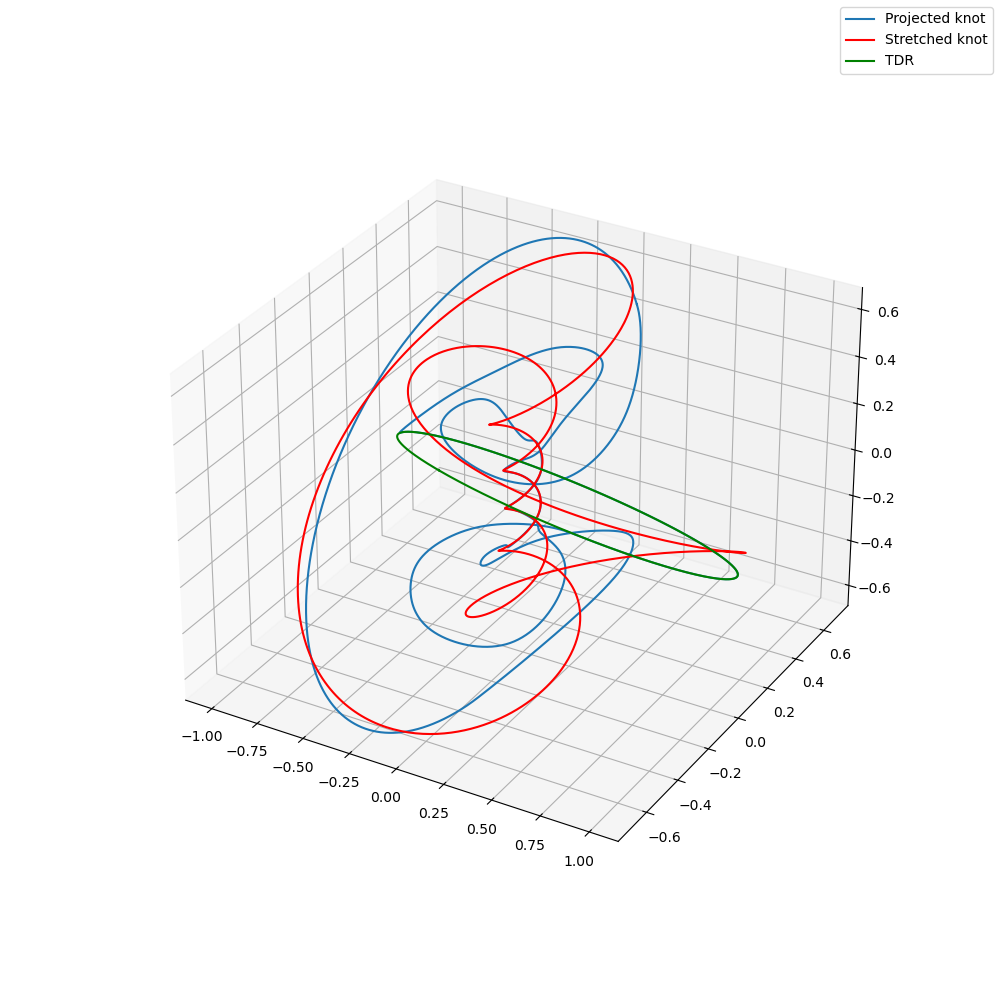

In [37]:
# knot params
a=0.5
p=7
n=2000
n_tdr = n+1

# optimization params
curve_opt_params = {
    'w_tdr': 10,
    'w_curvature': 2.7e5,
    'max_iter': 400,
    'factor_cps_to_pts': 52,
    'n_cps_int_per_seg': 31,
    'curvature_damping': 6,
    'tdr_damping': 6
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [38]:
save_all(ko)

Fixing 0 parameters.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47428D-01    |proj g|=  8.40818D-01

At iterate    1    f=  5.74097D-01    |proj g|=  2.40973D-01

At iterate    2    f=  4.12791D-01    |proj g|=  8.33972D-01

At iterate    3    f=  3.91556D-01    |proj g|=  1.13228D+00

At iterate    4    f=  3.68278D-01    |proj g|=  1.80370D-01

At iterate    5    f=  3.67277D-01    |proj g|=  1.75881D-01

At iterate    6    f=  3.59268D-01    |proj g|=  1.34995D-01

At iterate    7    f=  3.52215D-01    |proj g|=  8.98200D-02

At iterate    8    f=  3.43090D-01    |proj g|=  1.71147D-01

At iterate    9    f=  3.32134D-01    |proj g|=  1.96037D-01

At iterate   10    f=  3.27628D-01    |proj g|=  1.04775D-01

At iterate   11    f=  3.27248D-01    |proj g|=  2.94677D-01

At iterate   12    f=  3.26925D-01    |proj g|=  2.64650D-02

At it

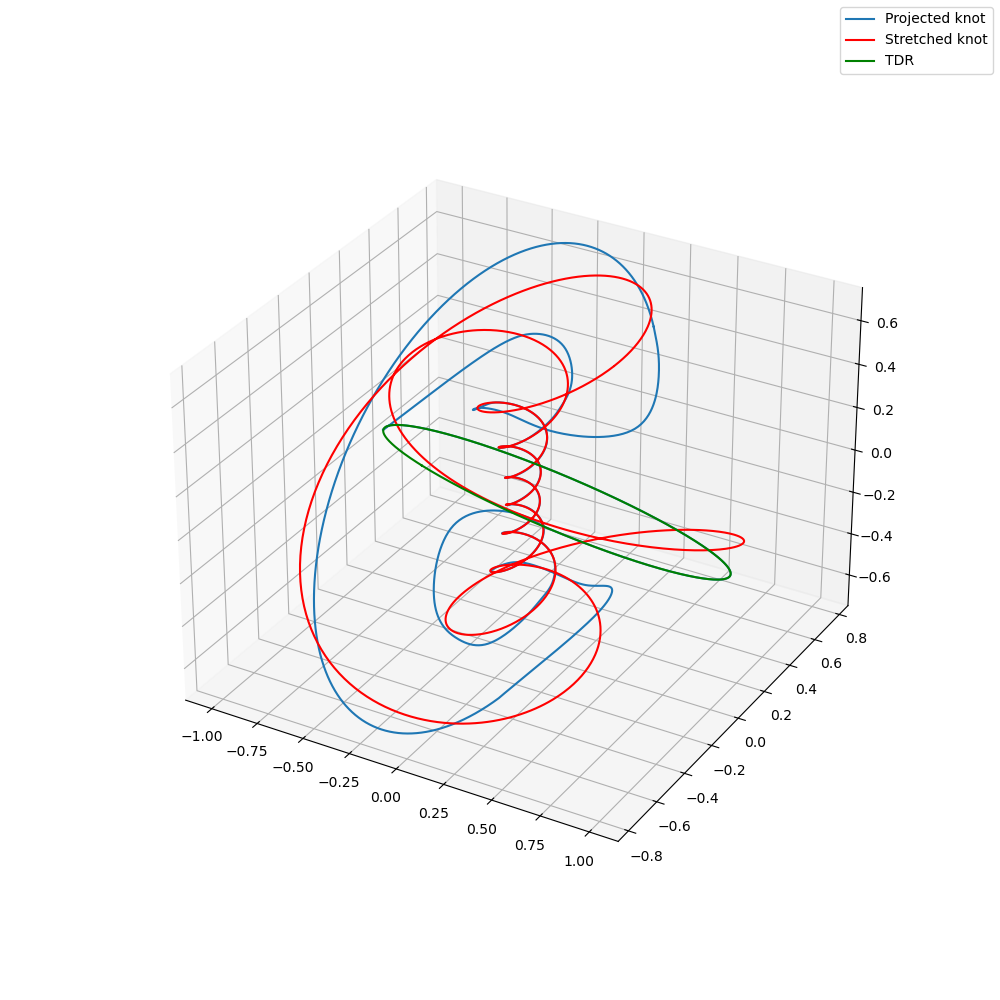

In [ ]:
# knot params
a=0.5
p=9
n=3001
n_tdr = n

# optimization params
curve_opt_params = {
    'w_tdr': 10,
    'w_curvature': 4500,
    'max_iter': 400,
    'factor_cps_to_pts': 32,
    'n_cps_int_per_seg': 31,
    'curvature_damping': 6,
    'tdr_damping': 6,
}

ko = run(a,p,n,n_tdr,curve_opt_params)

In [ ]:
save_all(ko)